In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('ticks')
%matplotlib inline

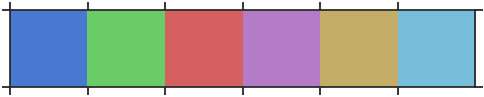

In [92]:
sns.palplot(
sns.color_palette('muted'))
sns.set_palette(sns.color_palette('muted'))

In [97]:
df = pd.read_csv('result.csv')

In [98]:
df.tail()

,p,n,millisecond,method
35,0.8,7,6364,mine
36,0.8,7,22018,original
37,0.8,7,6516,mine
38,0.8,7,21969,original
39,0.8,7,6042,mine


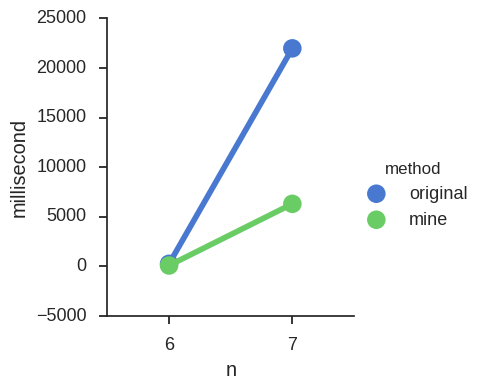

In [99]:
sns.factorplot(x="n", y="millisecond", data=df, hue='method')